In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import perlin
import palletes

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()

In [28]:
pi = np.pi
twopi = 2*np.pi
sqrt2 = np.sqrt(2)
sqrt3 = np.sqrt(3)
degree = 180/pi

def unit_vector(angle):
    return np.array([np.cos(angle),np.sin(angle)])

def rotation_matrix(angle):

    return np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])

def clamp(vector,max_length):

    length = np.linalg.norm(vector)

    if length < max_length:
        return vector
    else:
        return (max_length/length)*vector

In [32]:
class Boid:

    def __init__(self,position,velocity=None, max_speed=None, acceleration = None, max_acceleration = None):
        
        self.position = position
        if velocity is None:
            self.velocity = np.zeros_like(position)
        else:
            self.velocity = velocity
        if max_speed is None:
            self.max_speed = 5
        else:
            self.max_speed = max_speed

        if acceleration is None:
            self.acceleration = np.zeros_like(position)
        else:
            self.acceleration = acceleration

        if max_acceleration is None:
            self.max_acceleration = 5
        else:
            self.max_acceleration = max_acceleration

    def get_speed(self):

        speed = np.linalg.norm(self.velocity)
        return speed

    def get_direction(self,tol=1e-6):

        speed = self.get_speed()

        if speed <= tol:
            return np.zeros_like(self.velocity)
        else:
            return self.velocity/speed


    def move(self,dt):

        self.acceleration = clamp(self.acceleration,self.max_acceleration)
        self.velocity = clamp(self.velocity,self.max_speed)   

        self.position = self.position + self.velocity*dt + 0.5*self.acceleration*dt*dt
        self.velocity = self.velocity + self.acceleration*dt


    def steer(self,target,tol = 1e-6):

        target_direction = target - self.position
        distance = np.linalg.norm(target_direction)
        if distance<=tol:
            desired_velocity = np.zeros_like(self.velocity)
        else:
            desired_velocity = (self.max_speed/distance)*target_direction

        
        
    def wander(self,strength = 1,fov=240*degree):
        direction = self.get_direction()

        if (direction == np.zeros_like(self.velocity)).all:
            self.acceleration = strength*unit_vector(rng.uniform(-pi,pi))

        else:
            angle = rng.uniform(-0.5*fov,0.5*fov)

            self.acceleration = self.acceleration + strength*(np.dot(rotation_matrix(angle)*direction))

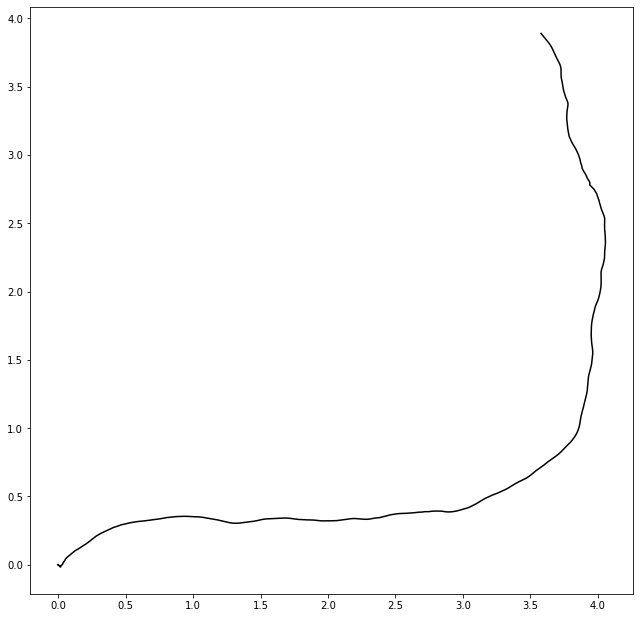

In [36]:
boid = Boid(np.array([0,0]))

Ts,dt = np.linspace(0,15,500,retstep=True)

trace = [boid.position]

for count, t in enumerate(Ts):

    boid.wander(strength=2)
    boid.move(dt)
    #print(boid.velocity)
    trace.append(boid.position)
    

trace = np.array(trace)

fig, ax = plt.subplots(figsize=(10.8,10.8))

ax.plot(trace[:,0],trace[:,1],'k-')
plt.show()